In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_excel(r"C:\Users\HP\Downloads\Documents\Hydrological Machine Learning Dataset.xlsx")



In [3]:
df.head()


,POINTS,Area(ha),𝐋𝐨𝐯 (𝐦),𝐇𝟏(𝐦),𝐇𝟐 (𝐦),𝐋𝐂𝐡 (𝐦),𝐇𝟑 (𝐦),𝐍,𝐒𝐎𝐕,𝐒𝐜𝐡,𝐓𝐎𝐕(𝐦𝐢𝐧𝐬),𝐓𝐜𝐡 (𝐦𝐢𝐧𝐬),𝐓𝐜(mins),𝐂,𝐈 (𝐦𝐦/𝐡𝐫),Unnamed: 15,Unnamed: 16,𝐃𝐢𝐬𝐜𝐡𝐚𝐫𝐠𝐞 𝐐 (𝐦𝟑⁄𝐬),Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,𝟐𝟓 𝐲𝐞𝐚𝐫,𝟓𝟎 𝐲𝐞𝐚𝐫,𝟏𝟎𝟎 𝐲𝐞𝐚𝐫,𝟐𝟓 𝐲𝐞𝐚𝐫,𝟓𝟎 𝐲𝐞𝐚𝐫,𝟏𝟎𝟎 𝐲𝐞𝐚𝐫
1,ISU-NJABA/EZIAMA ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PT_A_1,12.906,66.065,197.667,195.618,1762.0,150.234,0.3,0.03101,0.02576,13.13971,25.19207,38.33,0.34,168,192,220,2.05,2.34,2.68
3,PT_A_2,13.655,40.667,198.252,197.564,2029.0,150.977,0.3,0.01692,0.02296,12.07905,29.35374,41.43,0.34,158,181,210,2.04,2.33,2.71
4,PT_A_3,4.633,51.594,198.138,197.548,1509.0,121.120,0.3,0.01144,0.05065,14.80037,17.23330,32.03,0.34,183,210,235,0.8,0.92,1.03


In [4]:
df.tail()

,POINTS,Area(ha),𝐋𝐨𝐯 (𝐦),𝐇𝟏(𝐦),𝐇𝟐 (𝐦),𝐋𝐂𝐡 (𝐦),𝐇𝟑 (𝐦),𝐍,𝐒𝐎𝐕,𝐒𝐜𝐡,𝐓𝐎𝐕(𝐦𝐢𝐧𝐬),𝐓𝐜𝐡 (𝐦𝐢𝐧𝐬),𝐓𝐜(mins),𝐂,𝐈 (𝐦𝐦/𝐡𝐫),Unnamed: 15,Unnamed: 16,𝐃𝐢𝐬𝐜𝐡𝐚𝐫𝐠𝐞 𝐐 (𝐦𝟑⁄𝐬),Unnamed: 18,Unnamed: 19
20,PT_E_2,45.996,40.667,198.249,197.571,1316.00,164.87,0.3,0.01667,0.02485,12.12068,20.40231,32.52,0.34,180,205,230,7.82,8.91,9.99
21,PT_E_3,14.997,58.610,198.210,196.480,689.62,177.25,0.3,0.02952,0.02789,12.57053,11.86556,24.44,0.34,215,235,260,3.05,3.33,3.68
22,AMAUJU UMUDURU ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,PT_F_1,9.866,43.924,198.153,197.549,602.98,178.47,0.3,0.01375,0.03165,13.14653,10.19164,23.34,0.34,220,240,265,2.05,2.24,2.47
24,PT_F_2,21.490,40.667,198.252,197.564,680.10,183.53,0.3,0.01692,0.02064,12.07905,13.18122,25.26,0.34,210,233,259,4.26,4.73,5.26


In [5]:
df.dropna()

,POINTS,Area(ha),𝐋𝐨𝐯 (𝐦),𝐇𝟏(𝐦),𝐇𝟐 (𝐦),𝐋𝐂𝐡 (𝐦),𝐇𝟑 (𝐦),𝐍,𝐒𝐎𝐕,𝐒𝐜𝐡,𝐓𝐎𝐕(𝐦𝐢𝐧𝐬),𝐓𝐜𝐡 (𝐦𝐢𝐧𝐬),𝐓𝐜(mins),𝐂,𝐈 (𝐦𝐦/𝐡𝐫),Unnamed: 15,Unnamed: 16,𝐃𝐢𝐬𝐜𝐡𝐚𝐫𝐠𝐞 𝐐 (𝐦𝟑⁄𝐬),Unnamed: 18,Unnamed: 19
2,PT_A_1,12.906,66.065,197.667,195.618,1762.00,150.234,0.3,0.03101,0.02576,13.13971,25.19207,38.33,0.34,168,192,220,2.05,2.34,2.68
3,PT_A_2,13.655,40.667,198.252,197.564,2029.00,150.977,0.3,0.01692,0.02296,12.07905,29.35374,41.43,0.34,158,181,210,2.04,2.33,2.71
4,PT_A_3,4.633,51.594,198.138,197.548,1509.00,121.120,0.3,0.01144,0.05065,14.80037,17.23330,32.03,0.34,183,210,235,0.8,0.92,1.03
5,PT_A_4_L,8.959,147.600,194.027,190.103,488.30,172.002,0.3,0.02659,0.03707,19.83127,8.15178,27.98,0.34,200,222,249,1.69,1.88,2.11
6,PT_A_4_R,21.314,23.210,197.693,197.429,586.30,182.772,0.3,0.01137,0.02500,10.20482,10.92159,21.13,0.34,230,250,275,4.63,5.03,5.54
8,PT_B_1,7.128,169.630,156.353,154.465,430.99,148.581,0.3,0.01113,0.01365,25.96740,10.87728,36.84,0.34,155,180,208,1.04,1.21,1.4
9,PT_B_2,13.964,81.081,154.918,154.223,586.38,147.368,0.3,0.00857,0.01169,19.56018,14.63587,34.20,0.34,190,215,240,2.51,2.84,3.17
10,PT_B_3,2.831,200.360,148.594,146.668,241.32,145.438,0.3,0.00961,0.00510,29.05061,10.16989,39.22,0.34,162,190,215,0.43,0.51,0.57
12,PT_C_1,21.329,49.940,196.571,195.553,1311.00,156.304,0.3,0.02038,0.02994,12.72531,18.93397,31.66,0.34,183,210,235,3.69,4.23,4.73
14,PT_D_1,4.666,76.349,197.759,196.236,1421.00,155.204,0.3,0.01995,0.02888,15.59451,20.42813,36.02,0.34,170,199,225,0.75,0.88,0.99


In [6]:
Gully_dataset=df.dropna()

In [7]:
Gully_dataset.head()

,POINTS,Area(ha),𝐋𝐨𝐯 (𝐦),𝐇𝟏(𝐦),𝐇𝟐 (𝐦),𝐋𝐂𝐡 (𝐦),𝐇𝟑 (𝐦),𝐍,𝐒𝐎𝐕,𝐒𝐜𝐡,𝐓𝐎𝐕(𝐦𝐢𝐧𝐬),𝐓𝐜𝐡 (𝐦𝐢𝐧𝐬),𝐓𝐜(mins),𝐂,𝐈 (𝐦𝐦/𝐡𝐫),Unnamed: 15,Unnamed: 16,𝐃𝐢𝐬𝐜𝐡𝐚𝐫𝐠𝐞 𝐐 (𝐦𝟑⁄𝐬),Unnamed: 18,Unnamed: 19
2,PT_A_1,12.906,66.065,197.667,195.618,1762.0,150.234,0.3,0.03101,0.02576,13.13971,25.19207,38.33,0.34,168,192,220,2.05,2.34,2.68
3,PT_A_2,13.655,40.667,198.252,197.564,2029.0,150.977,0.3,0.01692,0.02296,12.07905,29.35374,41.43,0.34,158,181,210,2.04,2.33,2.71
4,PT_A_3,4.633,51.594,198.138,197.548,1509.0,121.120,0.3,0.01144,0.05065,14.80037,17.23330,32.03,0.34,183,210,235,0.8,0.92,1.03
5,PT_A_4_L,8.959,147.600,194.027,190.103,488.3,172.002,0.3,0.02659,0.03707,19.83127,8.15178,27.98,0.34,200,222,249,1.69,1.88,2.11
6,PT_A_4_R,21.314,23.210,197.693,197.429,586.3,182.772,0.3,0.01137,0.02500,10.20482,10.92159,21.13,0.34,230,250,275,4.63,5.03,5.54


In [8]:
Gully_dataset=Gully_dataset.rename(columns={
    "Unnamed: 15": "I 50Yr",
    "Unnamed: 16": "I 100Yr",
    "Unnamed: 18": "Q 50Yr",
    "Unnamed: 19": "Q 100Yr",
    "I(mm/hr)": "I 25yr",
    "Discharge Q(m3/s)": "Q 25Yr"
})

In [16]:
Gully_dataset.head()

,POINTS,Area(ha),𝐋𝐨𝐯 (𝐦),𝐇𝟏(𝐦),𝐇𝟐 (𝐦),𝐋𝐂𝐡 (𝐦),𝐇𝟑 (𝐦),𝐍,𝐒𝐎𝐕,𝐒𝐜𝐡,𝐓𝐎𝐕(𝐦𝐢𝐧𝐬),𝐓𝐜𝐡 (𝐦𝐢𝐧𝐬),𝐓𝐜(mins),𝐂,𝐈 (𝐦𝐦/𝐡𝐫),I 50Yr,I 100Yr,𝐃𝐢𝐬𝐜𝐡𝐚𝐫𝐠𝐞 𝐐 (𝐦𝟑⁄𝐬),Q 50Yr,Q 100Yr
2,PT_A_1,12.906,66.065,197.667,195.618,1762.0,150.234,0.3,0.03101,0.02576,13.13971,25.19207,38.33,0.34,168,192,220,2.05,2.34,2.68
3,PT_A_2,13.655,40.667,198.252,197.564,2029.0,150.977,0.3,0.01692,0.02296,12.07905,29.35374,41.43,0.34,158,181,210,2.04,2.33,2.71
4,PT_A_3,4.633,51.594,198.138,197.548,1509.0,121.120,0.3,0.01144,0.05065,14.80037,17.23330,32.03,0.34,183,210,235,0.8,0.92,1.03
5,PT_A_4_L,8.959,147.600,194.027,190.103,488.3,172.002,0.3,0.02659,0.03707,19.83127,8.15178,27.98,0.34,200,222,249,1.69,1.88,2.11
6,PT_A_4_R,21.314,23.210,197.693,197.429,586.3,182.772,0.3,0.01137,0.02500,10.20482,10.92159,21.13,0.34,230,250,275,4.63,5.03,5.54


In [9]:
for i, col in enumerate(Gully_dataset.columns):
    print(i, repr(col))


0 'POINTS'
1 'Area(ha)'
2 '𝐋𝐨𝐯 (𝐦)'
3 '𝐇𝟏(𝐦)'
4 '𝐇𝟐 (𝐦)'
5 '𝐋𝐂𝐡 (𝐦)'
6 '𝐇𝟑 (𝐦)'
7 '𝐍'
8 '𝐒𝐎𝐕'
9 '𝐒𝐜𝐡'
10 '𝐓𝐎𝐕(𝐦𝐢𝐧𝐬)'
11 '𝐓𝐜𝐡 (𝐦𝐢𝐧𝐬)'
12 '𝐓𝐜(mins)'
13 '𝐂'
14 '𝐈 (𝐦𝐦/𝐡𝐫)'
15 'I 50Yr'
16 'I 100Yr'
17 '𝐃𝐢𝐬𝐜𝐡𝐚𝐫𝐠𝐞 𝐐 (𝐦𝟑⁄𝐬)'
18 'Q 50Yr'
19 'Q 100Yr'


In [10]:
features = ["Area(ha)", "𝐂", "𝐓𝐜(mins)", "𝐈 (𝐦𝐦/𝐡𝐫)"]
X = Gully_dataset[features]
y = Gully_dataset["𝐃𝐢𝐬𝐜𝐡𝐚𝐫𝐠𝐞 𝐐 (𝐦𝟑⁄𝐬)"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (18, 4)
Target shape: (18,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [12]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

In [13]:
y_pred = model.predict(X_test)


In [14]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics")
print("-------------------------")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Model Performance Metrics
-------------------------
R² Score: 0.3039
MSE: 0.7033
RMSE: 0.8386


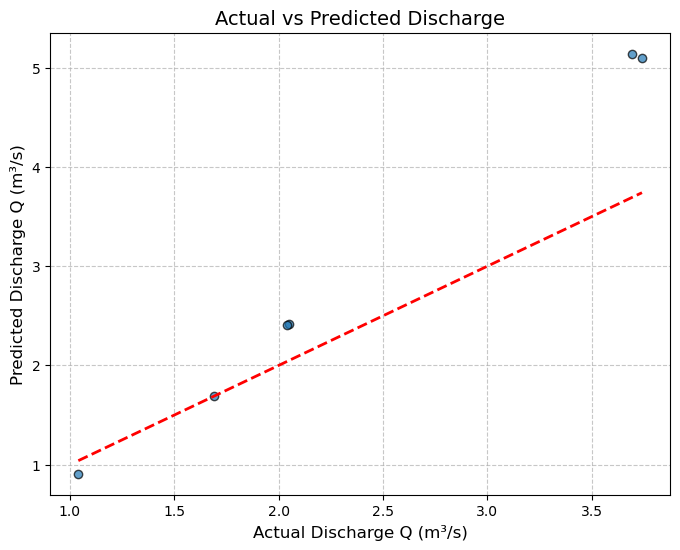

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45° line

plt.title("Actual vs Predicted Discharge", fontsize=14)
plt.xlabel("Actual Discharge Q (m³/s)", fontsize=12)
plt.ylabel("Predicted Discharge Q (m³/s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


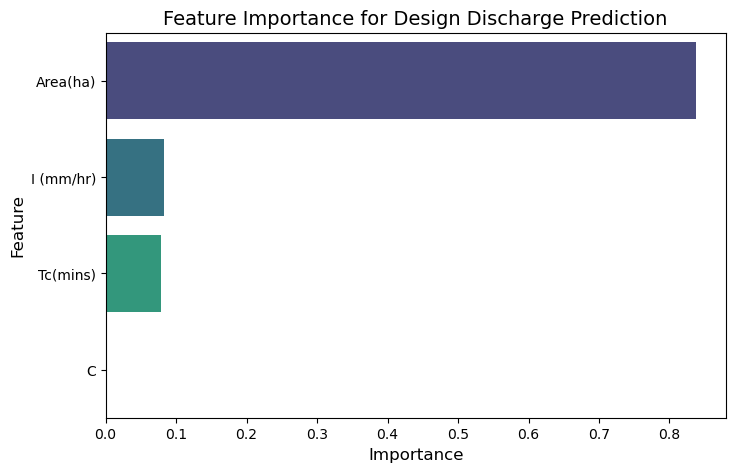

In [16]:
import unicodedata

# Function to clean column names
def clean_column_names(columns):
    return [
        unicodedata.normalize("NFKD", col).encode("ascii", "ignore").decode("utf-8")
        for col in columns
    ]

# Clean dataset + X features
Gully_dataset.columns = clean_column_names(Gully_dataset.columns)
X.columns = clean_column_names(X.columns)

# Build feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot with fixed palette usage
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance, 
    hue='Feature',       # required for seaborn >=0.14
    dodge=False,         # ensures bars don't split
    legend=False, 
    palette='viridis'
)
plt.title('Feature Importance for Design Discharge Prediction', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression

surrogate = LinearRegression()
surrogate.fit(X, model.predict(X))


for name, coef in zip(X.columns, surrogate.coef_):
    print(f"{name}: {coef:.4f}")
print(f"Intercept: {surrogate.intercept_:.4f}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- C
- I (mm/hr)
- Tc(mins)
Feature names seen at fit time, yet now missing:
- 𝐂
- 𝐈 (𝐦𝐦/𝐡𝐫)
- 𝐓𝐜(mins)
